### Dataset link: https://www.kaggle.com/datasets/razinw/dog-vs-cat

### Import the library

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Setting up the dataset directory

In [2]:
train_dir = 'train'
test_dir = 'test'

### Import the deep learning libraries

In [3]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 500 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


### Convolutional Neural Network

In [5]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

In [7]:
model.compile(loss='binary_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [8]:
history = model.fit_generator(
              train_generator,steps_per_epoch=train_generator.samples//20,epochs=50,
              validation_data=test_generator,validation_steps=test_generator.samples//20)

C:\Users\admin\AppData\Local\Temp\ipykernel_2192\3279687358.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
25/25 [==============================] - 66s 2s/step - loss: 0.8702 - accuracy: 0.4860 - val_loss: 0.6913 - val_accuracy: 0.5500
Epoch 2/50
25/25 [==============================] - 55s 2s/step - loss: 0.6936 - accuracy: 0.5060 - val_loss: 0.6920 - val_accuracy: 0.5750
Epoch 3/50
25/25 [==============================] - 61s 2s/step - loss: 0.6916 - accuracy: 0.5360 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/50
25/25 [==============================] - 62s 2s/step - loss: 0.6919 - accuracy: 0.5320 - val_loss: 0.6930 - val_accuracy: 0.4750
Epoch 5/50
25/25 [==============================] - 63s 2s/step - loss: 0.6856 - accuracy: 0.5360 - val_loss: 0.6975 - val_accuracy: 0.4750
Epoch 6/50
25/25 [==============================] - 61s 2s/step - loss: 0.6647 - accuracy: 0.5980 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 7/50
25/25 [==============================] - 61s 2s/step - loss: 0.6616 - accuracy: 0.6340 - val_loss: 0.6811 - val_accuracy: 0.5750
Epoch 8/50
25/25 [==

### Plots

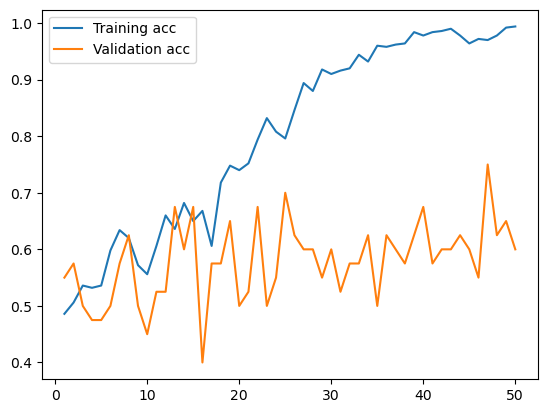

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,label='Training acc')
plt.plot(epochs,val_acc,label='Validation acc')
plt.legend()
plt.show()

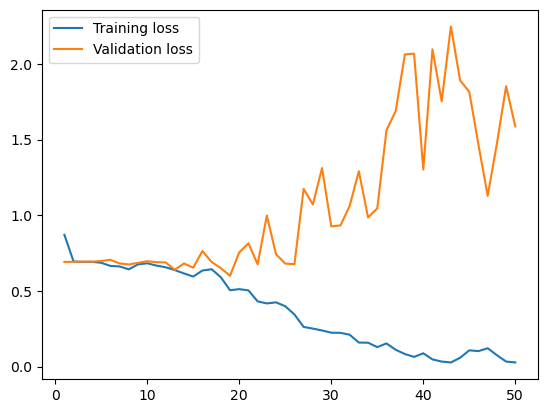

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs,loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.legend()
plt.show()

In [11]:
model.save('catvsdog.h5')

F:\Anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Prediction

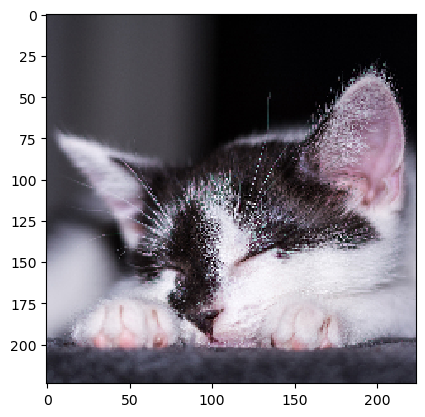

In [11]:
from tensorflow.keras.preprocessing import image
path ='test/0/251.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [12]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [13]:
img_array=img_array.reshape(1,224,224,3)

In [14]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 241ms/step
cat


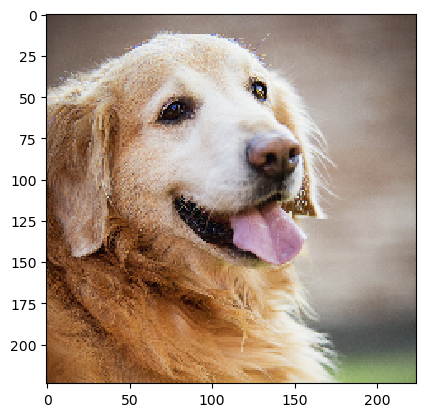

In [15]:
path ='test/1/264.jpg'
img1 = image.load_img(path,target_size=(224,224))
plt.imshow(img1,interpolation='nearest')
plt.show()

In [16]:
img_array1 = np.array(img1)
img_array1.shape

(224, 224, 3)

In [17]:
img_array1=img_array1.reshape(1,224,224,3)

In [18]:
a = model.predict(img_array1)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 41ms/step
dog
